<AxesSubplot:>

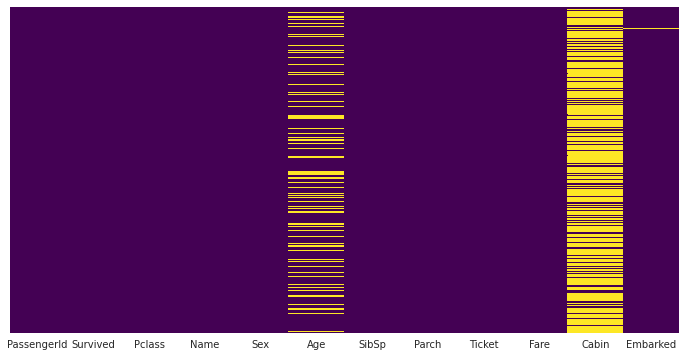

In [4]:
import pandas
from matplotlib import pyplot
import seaborn

%matplotlib inline

titanic_train = pandas.read_csv('titanic_train.csv')

pyplot.figure(figsize=(12, 6))
seaborn.heatmap(titanic_train.isnull(), cmap='viridis', yticklabels=False, cbar=False)



<AxesSubplot:xlabel='Survived', ylabel='count'>

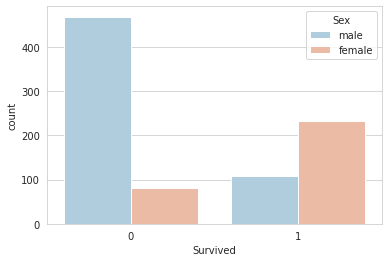

In [5]:
seaborn.set_style('whitegrid')
seaborn.countplot(x='Survived', data=titanic_train, hue='Sex', palette='RdBu_r')

<AxesSubplot:>

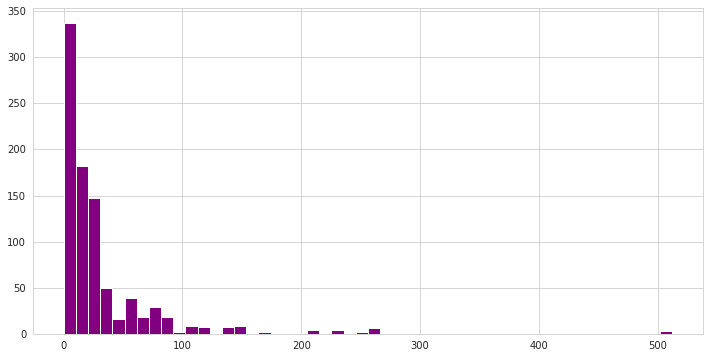

In [6]:
titanic_train['Fare'].hist(color='purple', bins=50, figsize=(12, 6))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

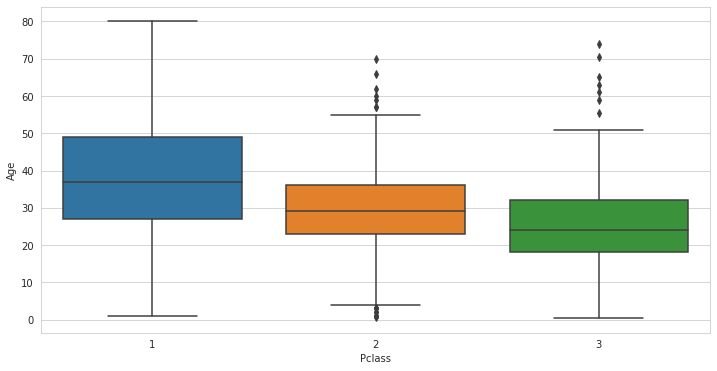

In [7]:
pyplot.figure(figsize=(12, 6))
seaborn.boxplot(x='Pclass', y='Age', data=titanic_train)

<AxesSubplot:>

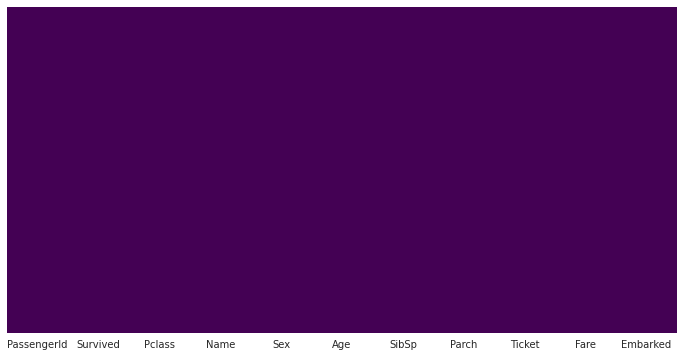

In [36]:
def input_age(cols):
    age = cols[0]
    pclass = cols[1]

    if pandas.isnull(age):
        if pclass == 1:
            return 37
        elif  pclass == 2:
            return 29
        else:
            return 24
    return age               

titanic_train['Age'] = titanic_train[['Age', 'Pclass']].apply(input_age, axis=1)

pyplot.figure(figsize=(12, 6))
seaborn.heatmap(titanic_train.isnull(), cmap='viridis', yticklabels=False, cbar=False)


In [8]:
titanic_train.dropna(inplace=True)

In [9]:
sex = pandas.get_dummies(titanic_train['Sex'], drop_first=True)
sex

male
1       0
3       0
6       1
10      0
11      0
..    ...
871     0
872     1
879     0
887     0
889     1

[183 rows x 1 columns]

In [10]:
titanic_train['Embarked'].value_counts()

S    116
C     65
Q      2
Name: Embarked, dtype: int64

In [11]:
embarked = pandas.get_dummies(titanic_train['Embarked'], drop_first=True)
embarked

Q  S
1    0  0
3    0  1
6    0  1
10   0  1
11   0  1
..  .. ..
871  0  1
872  0  1
879  0  0
887  0  1
889  0  0

[183 rows x 2 columns]

In [14]:
titanic_train = pandas.concat([titanic_train, sex, embarked], axis=1)
titanic_train


Survived  Pclass   Age  SibSp  Parch    Ticket     Fare  male  Q  S
1           1       1  38.0      1      0  PC 17599  71.2833     0  0  0
3           1       1  35.0      1      0    113803  53.1000     0  0  1
6           0       1  54.0      0      0     17463  51.8625     1  0  1
10          1       3   4.0      1      1   PP 9549  16.7000     0  0  1
11          1       1  58.0      0      0    113783  26.5500     0  0  1
..        ...     ...   ...    ...    ...       ...      ...   ... .. ..
871         1       1  47.0      1      1     11751  52.5542     0  0  1
872         0       1  33.0      0      0       695   5.0000     1  0  1
879         1       1  56.0      0      1     11767  83.1583     0  0  0
887         1       1  19.0      0      0    112053  30.0000     0  0  1
889         1       1  26.0      0      0    111369  30.0000     1  0  0

[183 rows x 10 columns]

In [14]:
titanic_train.drop(['Sex', 'Embarked', 'Ticket', 'PassengerId', 'Cabin', 'Name'], axis=1, inplace=True)


KeyError: "['Sex' 'Embarked' 'Ticket' 'PassengerId'] not found in axis"

In [15]:
titanic_train

Survived  Pclass                                               Name  \
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
6           0       1                            McCarthy, Mr. Timothy J   
10          1       3                    Sandstrom, Miss. Marguerite Rut   
11          1       1                           Bonnell, Miss. Elizabeth   
..        ...     ...                                                ...   
871         1       1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
872         0       1                           Carlsson, Mr. Frans Olof   
879         1       1      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)   
887         1       1                       Graham, Miss. Margaret Edith   
889         1       1                              Behr, Mr. Karl Howell   

      Age  SibSp  Parch     Fare        Cabin  
1    38.0      1      0  71.2833          C85  
3    35.0      1      0  53.1000         C123  
6    54.0      0      0  51.8625          E46  
10    4.0      1      1  16.7000           G6  
11   58.0      0      0  26.5500         C103  
..    ...    ...    ...      ...          ...  
871  47.0      1      1  52.5542          D35  
872  33.0      0      0   5.0000  B51 B53 B55  
879  56.0      0      1  83.1583          C50  
887  19.0      0      0  30.0000          B42  
889  26.0      0      0  30.0000         C148  

[183 rows x 8 columns]